In [1]:
pip install numpy opencv-python scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:

def detect_colors(image, num_colors=5):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    kmeans = KMeans(n_clusters=num_colors, n_init=10)  # Explicitly set n_init to avoid FutureWarning
    kmeans.fit(image)
    colors = kmeans.cluster_centers_.astype(int)
    
    return colors

In [4]:
def simulate_color_blindness(image, deficiency_type):
    # Define transformation matrices for different types of color blindness
    matrix = {
        'protanopia': np.array([[56.667/100, 43.333/100, 0],
                                [55.833/100, 44.167/100, 0],
                                [0, 24.167/100, 75.833/100]]),
        'protanomaly': np.array([[81.667/100, 18.333/100, 0],
                                 [33.333/100, 66.667/100, 0],
                                 [0, 12.5/100, 87.5/100]]),
        'deuteranopia': np.array([[62.5/100, 37.5/100, 0],
                                  [70/100, 30/100, 0],
                                  [0, 30/100, 70/100]]),
        'deuteranomaly': np.array([[80/100, 20/100, 0],
                                   [25.833/100, 74.167/100, 0],
                                   [0, 14.167/100, 85.833/100]]),
        'tritanopia': np.array([[95/100, 5/100, 0],
                                [0, 43.333/100, 56.667/100],
                                [0, 47.5/100, 52.5/100]]),
        'tritanomaly': np.array([[96.667/100, 3.333/100, 0],
                                 [0, 73.333/100, 26.667/100],
                                 [0, 18.333/100, 81.667/100]]),
        'achromatopsia': np.array([[29.9/100, 29.9/100, 29.9/100],
                                   [58.7/100, 58.7/100, 58.7/100],
                                   [11.4/100, 11.4/100, 11.4/100]]),
        'achromatomaly': np.array([[61.8/100, 32/100, 6.2/100],
                                   [16.3/100, 77.5/100, 6.2/100],
                                   [16.3/100, 32/100, 51.6/100]])
    }.get(deficiency_type, np.eye(3))  # Default to identity matrix if type is not found

    # Apply the matrix transformation to the image
    transformed_image = cv2.transform(image, matrix)
    
    return transformed_image


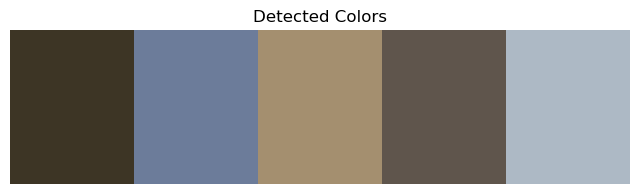

In [5]:
#this funtion is to display the captured frames taken through web cam and also provides the window seperatly for original frame
#and simuulated frame.
def display_images(original, simulated):
    cv2.imshow('Original Webcam View', original)
    cv2.imshow('Simulated View', simulated)

# Initialize webcam
cap = cv2.VideoCapture(0)

# Check if webcam is opened correctly
# if not working prints error
if not cap.isOpened():
    print("Error: Could not open webcam.")

frame_count = 0
max_frames = 1

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Detect colors
    colors = detect_colors(frame)
    
    # Simulate color blindness
    simulated_image = simulate_color_blindness(frame, 'tritanopia')
    
    # Display original and simulated images in separate windows
    display_images(frame, simulated_image)
    
    # Display detected colors
    plt.figure(figsize=(8, 2))
    plt.imshow([colors], aspect='auto')
    plt.axis('off')
    plt.title('Detected Colors')
    plt.show(block=False)
    plt.pause(2)  # Increase pause to control update frequency
    
    # Wait for a key press before proceeding
    cv2.waitKey(0)
    
    frame_count += 1

# Release resources
cap.release()
cv2.destroyAllWindows()


SyntaxError: invalid syntax (2771349641.py, line 1)